# Линейная регрессия. Работа с признаками

## Описание задачи и загрузка данных

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [24]:
data = pd.read_csv('https://raw.githubusercontent.com/evgpat/edu_stepik_practical_ml/main/datasets/diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Посмотрим на типы столбцов.

In [25]:
data.dtypes

,0
Unnamed: 0,int64
carat,float64
cut,object
color,object
clarity,object
depth,float64
table,float64
price,int64
x,float64
y,float64


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

## Построение модели

### Задание 1

Есть ли в наборе данных пропущенные значения? Если да, удалите их.

Также выведите на экран число пропусков в каждом столбце.

In [26]:
# your code here
data.isna().sum()

,0
Unnamed: 0,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0


### Задача 2

Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)?  
Если да, то удалите их.

In [27]:
# your code here
data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [31]:
data = data.drop('Unnamed: 0', axis=1)

In [32]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Задание 3

Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются корреляции между признаками.  
Выведите матрицу корреляций между всеми вещественными признаками и целевой переменной.

Какой вещественный признак коррелирует с целевой переменной больше всего?

In [33]:
import seaborn as sns

In [34]:
data_num = data.drop(['cut', 'color', 'clarity'], axis=1 )

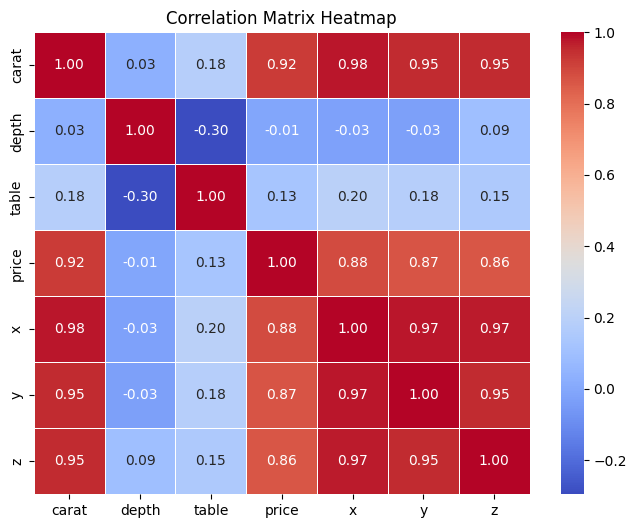

In [35]:
corr_matrix = data_num.corr()

# Визуализируем корреляционную матрицу с помощью тепловой карты (heatmap) Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Задание 4

Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования ([`pd.get_dummies`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)). Не забудьте поставить значение параметра `drop_first` равным `True`.

Сколько получилось столбцов в таблице `data`?

*P.S. Числовые столбцы оставляем в таблице без изменений.*

In [59]:
# your code here
one_hot_encoded_data = pd.get_dummies(data, columns = ['cut', 'color', 'clarity'], drop_first=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [68]:
#Extract categorical columns from the dataframe
#Here we extract the columns with object datatype as they are the categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

In [69]:
from sklearn.preprocessing import OneHotEncoder
#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)


In [71]:
#categorical_columns
# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(data[categorical_columns])

In [72]:
#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))
one_hot_df.head()

,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [73]:
# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([data, one_hot_df], axis=1)

In [74]:
# Drop the original categorical columns
df_encoded = df_encoded.drop(categorical_columns, axis=1)


In [75]:
df_encoded.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Задание 5

Создайте матрицу `X`, содержащую все признаки, и не содержащую целевую переменную `price`. Также создайте вектор `y`, содержащий целевую переменную `price`.

In [121]:
# your code here
X = df_encoded.drop(['price'], axis=1)
y = df_encoded['price']

Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной `0.3`.

При разбиении укажите `random_state = 42`.

In [122]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)


In [123]:
Xtrain.head()

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
19497,1.21,61.3,57.0,6.92,6.87,4.23,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
31229,0.31,62.0,56.0,4.38,4.36,2.71,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
22311,1.21,62.4,57.0,6.75,6.83,4.24,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
278,0.81,62.6,55.0,5.92,5.96,3.72,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6646,0.79,61.7,56.0,5.94,5.95,3.67,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Задание 6

Зачастую при использовании линейных моделей вещественные признаки масштабируются.  В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

*  Обучите (`fit`) scaler на тренировочных данных
*  Преобразуйте (`transform`) и трейн, и тест

После применения масштабирования матрица перестает быть объектом `pandas.DataFrame` - решите эту проблему.

In [89]:
from sklearn.preprocessing import StandardScaler

# your code here
ss = StandardScaler()
Xtrain = pd.DataFrame(ss.fit_transform(Xtrain))
Xtest = pd.DataFrame(ss.transform(Xtest))



### Задание 7

Обучите линейную регрессию на тренировочной выборке. Выведите *r2-score* на тренировочной и тестовой выборках.

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# your code here

# Создание модели
model = LinearRegression()
model.fit(Xtrain, ytrain)

# Предсказание
Y_pred = model.predict(Xtest)

# Оценка модели
#mse = mean_squared_error(Y_test, Y_pred)
r2_lr = r2_score(ytest, Y_pred)

#print(f'MSE: {mse}')
print(f'R²: {r2_lr}')
print(round(r2_lr, 1))

R²: 0.9201866914388086
0.9


In [92]:
#print(f'MSE: {mse}')
print(f'R²: {r2_lr}')
print(round(r2_lr, 1))

R²: 0.9201866914388086
0.9


### Задание 8

Выведите на экран веса, которые линейная регрессия присвоила признакам.

Какой признак имеет наибольший отрицательный вес? (наибольший по модулю среди всех отрицательных весов)

In [93]:
Xtrain

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.862659,-0.311437,-0.207099,1.055581,0.986556,0.968253,-0.175082,-0.314881,1.227398,-0.585893,...,-0.333294,-0.234494,-0.117361,-0.184885,-0.568277,-0.451216,-0.422668,-0.542475,-0.270252,3.121212
1,-1.029889,0.178549,-0.656213,-1.207734,-1.202544,-1.168276,-0.175082,-0.314881,1.227398,-0.585893,...,-0.333294,-0.234494,-0.117361,-0.184885,-0.568277,-0.451216,-0.422668,1.843403,-0.270252,-0.320388
2,0.862659,0.458541,-0.207099,0.904099,0.951670,0.982309,-0.175082,-0.314881,1.227398,-0.585893,...,-0.333294,-0.234494,-0.117361,-0.184885,-0.568277,-0.451216,2.365922,-0.542475,-0.270252,-0.320388
3,0.021527,0.598537,-1.105327,0.164512,0.192898,0.251391,-0.175082,-0.314881,1.227398,-0.585893,...,-0.333294,-0.234494,-0.117361,-0.184885,-0.568277,2.216235,-0.422668,-0.542475,-0.270252,-0.320388
4,-0.020530,-0.031445,-0.656213,0.182333,0.184176,0.181110,-0.175082,-0.314881,1.227398,-0.585893,...,3.000353,-0.234494,-0.117361,-0.184885,-0.568277,-0.451216,-0.422668,-0.542475,-0.270252,3.121212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37753,0.526206,0.458541,0.691128,0.663511,0.672581,0.715243,-0.175082,-0.314881,-0.814732,-0.585893,...,3.000353,-0.234494,-0.117361,-0.184885,-0.568277,-0.451216,-0.422668,1.843403,-0.270252,-0.320388
37754,-0.693436,-0.521432,-1.105327,-0.628540,-0.635646,-0.676312,-0.175082,-0.314881,1.227398,-0.585893,...,-0.333294,-0.234494,-0.117361,-0.184885,-0.568277,-0.451216,2.365922,-0.542475,-0.270252,-0.320388
37755,-0.987832,-1.011418,0.242014,-1.109717,-1.115329,-1.182333,-0.175082,-0.314881,-0.814732,-0.585893,...,-0.333294,-0.234494,-0.117361,5.408771,-0.568277,-0.451216,-0.422668,-0.542475,-0.270252,-0.320388
37756,0.210782,0.738533,0.691128,0.351636,0.253949,0.391952,-0.175082,-0.314881,-0.814732,1.706796,...,-0.333294,4.264502,-0.117361,-0.184885,1.759705,-0.451216,-0.422668,-0.542475,-0.270252,-0.320388


In [114]:
# your code here
print(model.coef_, model.intercept_)



[[-1.10041885e+03 -4.91478784e+02 -4.73825710e+02 -3.87497828e+02
  -2.51210002e+02 -1.46575938e+02 -1.30497542e+02 -1.25711003e+02
  -9.01738170e+01 -6.03322799e+01 -4.13959892e+01 -3.42589446e+01
  -6.45891672e+00  1.37080731e+00  1.64647406e+01  5.19922058e+01
   5.61664668e+01  1.02180310e+02  1.39770235e+02  1.62482671e+02
   2.02574923e+02  2.11310541e+02  2.44223357e+02  2.53972938e+02
   2.71780476e+02  5.33861567e+03]] [3951.49531225]


In [116]:
weights = model.coef_
weights

array([[-1.10041885e+03, -4.91478784e+02, -4.73825710e+02,
        -3.87497828e+02, -2.51210002e+02, -1.46575938e+02,
        -1.30497542e+02, -1.25711003e+02, -9.01738170e+01,
        -6.03322799e+01, -4.13959892e+01, -3.42589446e+01,
        -6.45891672e+00,  1.37080731e+00,  1.64647406e+01,
         5.19922058e+01,  5.61664668e+01,  1.02180310e+02,
         1.39770235e+02,  1.62482671e+02,  2.02574923e+02,
         2.11310541e+02,  2.44223357e+02,  2.53972938e+02,
         2.71780476e+02,  5.33861567e+03]])

In [118]:
importances = pd.DataFrame({'weights': model.coef_[0], 'features': Xtrain.columns}).sort_values(by='weights')
importances

,weights,features
0,-1100.418850,0
1,-491.478784,1
2,-473.825710,2
3,-387.497828,3
4,-251.210002,4
5,-146.575938,5
6,-130.497542,6
7,-125.711003,7
8,-90.173817,8
9,-60.332280,9


In [128]:
weights = model.coef_[0]
weights

array([-1.10041885e+03, -4.91478784e+02, -4.73825710e+02, -3.87497828e+02,
       -2.51210002e+02, -1.46575938e+02, -1.30497542e+02, -1.25711003e+02,
       -9.01738170e+01, -6.03322799e+01, -4.13959892e+01, -3.42589446e+01,
       -6.45891672e+00,  1.37080731e+00,  1.64647406e+01,  5.19922058e+01,
        5.61664668e+01,  1.02180310e+02,  1.39770235e+02,  1.62482671e+02,
        2.02574923e+02,  2.11310541e+02,  2.44223357e+02,  2.53972938e+02,
        2.71780476e+02,  5.33861567e+03])

In [129]:
feature_weights = list(zip(X.columns, weights))

In [130]:
for featture, weight in feature_weights:
  print(featture, ',', weight)

carat , -1100.4188500393147
depth , -491.47878446076874
table , -473.8257100444956
x , -387.4978278456529
y , -251.2100015816271
z , -146.5759376785182
cut_Fair , -130.49754248396206
cut_Good , -125.71100344120752
cut_Ideal , -90.17381703342414
cut_Premium , -60.33227991027987
cut_Very Good , -41.395989209399985
color_D , -34.25894462088975
color_E , -6.458916720544451
color_F , 1.3708073124344833
color_G , 16.464740644585497
color_H , 51.992205790302265
color_I , 56.166466787024625
color_J , 102.18031038780398
clarity_I1 , 139.7702352224839
clarity_IF , 162.48267144108436
clarity_SI1 , 202.57492339556794
clarity_SI2 , 211.3105412387156
clarity_VS1 , 244.22335650418535
clarity_VS2 , 253.97293766136562
clarity_VVS1 , 271.7804759281626
clarity_VVS2 , 5338.615670614762


In [ ]:
#короче правильный ответ х. В общем где-то я ушел от данных в сторону. То искал r2 на отмасштабированых данных, то еще что-то...
# В общем улучшать нечего. "...."

## Попытка улучшить качество модели

Данная часть является творческой, и задания в ней немного сложнее, чем предыдущие.

Следующие вопросы не проверяются тестами.

### Задание 9

Как можно заметить из анализа корреляционной матрицы в задании 3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче, также свидетельствуют об этом. Для решения этой проблемы можно либо исключить некоторые признаки из модели (например, если признак линейно зависим с какими-то другими, его можно исключить из модели, т.е. удалить из матрицы объект-признак и заново обучить модель).

Удалите из матриц `Xtrain` и `Xtest` признак, который наиболее сильно коррелирует с остальными. Заново обучите модель и оцените её качество. Улучшилось ли качество модели?

Попробуйте удалить какой-то другой признак (можете попробовать несколько вариантов). Помогло ли это улучшить качество модели?

In [ ]:
# your code here

### Задание 10

Иногда генерация новых признаков помогает модели лучше находить взаимосвязи между целевой переменной и признаками. Попробуйте придумать новые признаки и добавить их в модель.  

Помогло ли это улучшить качество модели?

In [ ]:
# your code here